# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>


## <span style="color:darkred">Transformação de atributos</span>

Material Produzido por Moacir Antonelli Ponti<br>
*colaboração de Eugenio Cabral*

CeMEAI - ICMC/USP São Carlos

---

__Referência complementar__

DIEZ, David M.; BARR, Christopher D.; CETINKAYA-RUNDEL, Mine. **OpenIntro statistics**. 3.ed. OpenIntro, 2015. Capítulo 1.

***

## Distribuições de variáveis

Variáveis possuem distribuições diferentes de valores possíveis devido a sua natureza.

O senso comum vai assumir que temos uma das distribuições abaixo:

* uniforme

* normal

... e que correlações são sempre:

* lineares

Mas isso nem sempre acontece!

Pode ser útil transformar as variáveis para permitir melhor analisar os dados, inclusive suas correlações em particular com dados de natureza **exponencial**


In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.stats import norm, skew, skewnorm
from sklearn.preprocessing import PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

# carregando dados
data = pd.read_csv("./dados/municipios_mba.csv")
data.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


Vamos estudar as variáveis abaixo, exibindo seus gráficos de caixa.

<AxesSubplot:>

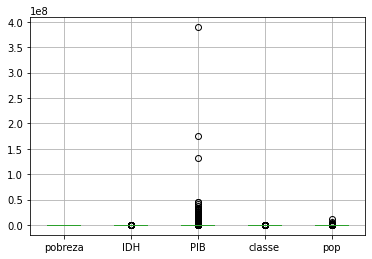

In [2]:
attrs = ['pobreza', 'IDH', 'PIB', 'classe', 'pop']
attrs_cat = attrs + ['UF', 'nome']
data.boxplot(attrs)

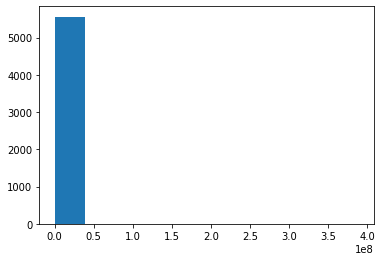

In [3]:
h = plt.hist(data['PIB'])

Parece difícil entender a variável PIB!

Talvez se aplicarmos uma transformação **logaritmica**!

Text(0.5, 0, 'Log(PIB)')

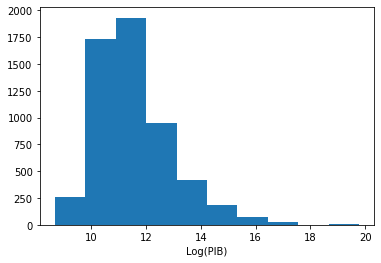

In [4]:
x_PIB = np.array(data['PIB'])
h = plt.hist(np.log(x_PIB+1));
plt.xlabel('Log(PIB)')

Além da transformação, pode ser útil também remover outliers antes!

In [5]:
def remove_outliers_IQR(df, attributes):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*1.5)) & (df[var] <= Q3+(IQR*1.5)),:]

    return dfn


Text(0.5, 0, 'Log(PIB)')

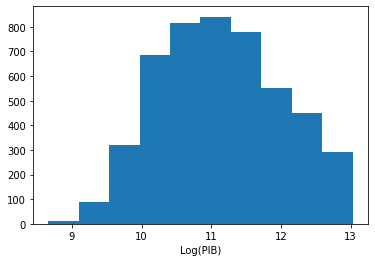

In [6]:
data_out = data.copy()
data_out = remove_outliers_IQR(data_out, ['PIB'])

# vamos adicionar essa nova variavel a base
x_PIB = np.array(data_out['PIB'])
h = plt.hist(np.log(x_PIB+1));
plt.xlabel('Log(PIB)')

Após limpeza de outliers e transformação os dados tem característica Normal e assim, modelos que consideram essa distribuição podem ser aplicados.

O log é o inverso da função exponencial e assim, estamos buscando linearizar os dados exponenciais.

In [7]:
data_out['Log_PIB'] = np.log(x_PIB+1)
attrs = attrs + ['Log_PIB']
data_out[attrs].corr()

,pobreza,IDH,PIB,classe,pop,Log_PIB
pobreza,1.000000,-0.942245,-0.170224,-0.507724,0.300206,-0.185381
IDH,-0.942245,1.000000,0.141545,0.419101,-0.221749,0.154362
PIB,-0.170224,0.141545,1.000000,0.346233,0.666058,0.902932
classe,-0.507724,0.419101,0.346233,1.000000,-0.223733,0.366278
pop,0.300206,-0.221749,0.666058,-0.223733,1.000000,0.649933
Log_PIB,-0.185381,0.154362,0.902932,0.366278,0.649933,1.000000


**Observar** que PIB e Log_PIB tem correlação 0.9

ou seja, ainda retemos muito da informação, apesar de transformada.

Agora vamos olhar para outras variáveis, que também não possuem distribuição bem comportada:

<AxesSubplot:>

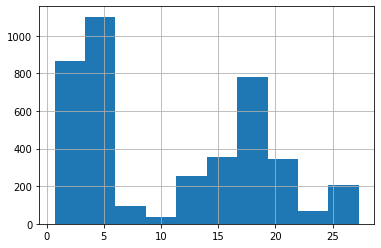

In [8]:
data_out['pobreza'].hist()

<AxesSubplot:>

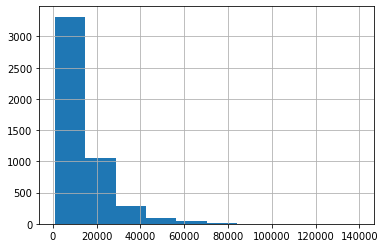

In [9]:
data_out['pop'].hist()

<AxesSubplot:xlabel='pop', ylabel='Log_PIB'>

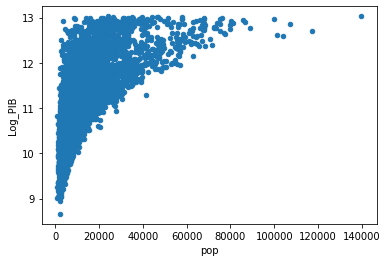

In [10]:
data_out.plot.scatter(x='pop', y='Log_PIB')

Outra função comumente utilizada (essa para linearizar dados de natureza quadrática),  é a raiz quadrada.

,pobreza,IDH,PIB,classe,pop,Log_PIB,Sqrt_pop
pobreza,1.000000,-0.942245,-0.170224,-0.507724,0.300206,-0.185381,0.320284
IDH,-0.942245,1.000000,0.141545,0.419101,-0.221749,0.154362,-0.242492
PIB,-0.170224,0.141545,1.000000,0.346233,0.666058,0.902932,0.684638
classe,-0.507724,0.419101,0.346233,1.000000,-0.223733,0.366278,-0.246793
pop,0.300206,-0.221749,0.666058,-0.223733,1.000000,0.649933,0.966454
Log_PIB,-0.185381,0.154362,0.902932,0.366278,0.649933,1.000000,0.717255
Sqrt_pop,0.320284,-0.242492,0.684638,-0.246793,0.966454,0.717255,1.000000


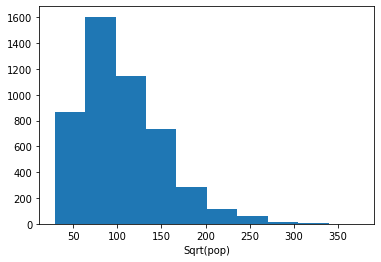

In [11]:
x_pop = np.array(data_out['pop'])
h = plt.hist(np.sqrt(x_pop));
plt.xlabel('Sqrt(pop)')

data_out['Sqrt_pop'] = np.sqrt(x_pop)
attrs = attrs + ['Sqrt_pop']
data_out[attrs].corr()

<AxesSubplot:xlabel='Sqrt_pop', ylabel='Log_PIB'>

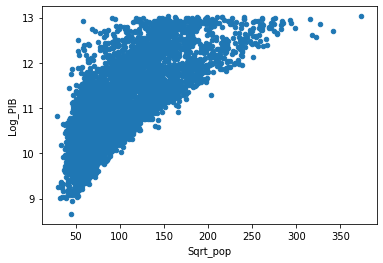

In [12]:
data_out.plot.scatter(x='Sqrt_pop', y='Log_PIB')

,pobreza,IDH,PIB,classe,pop,Log_PIB,Sqrt_pop,Sqrt_pobreza
pobreza,1.000000,-0.942245,-0.170224,-0.507724,0.300206,-0.185381,0.320284,0.991053
IDH,-0.942245,1.000000,0.141545,0.419101,-0.221749,0.154362,-0.242492,-0.959522
PIB,-0.170224,0.141545,1.000000,0.346233,0.666058,0.902932,0.684638,-0.178007
classe,-0.507724,0.419101,0.346233,1.000000,-0.223733,0.366278,-0.246793,-0.534099
pop,0.300206,-0.221749,0.666058,-0.223733,1.000000,0.649933,0.966454,0.298361
Log_PIB,-0.185381,0.154362,0.902932,0.366278,0.649933,1.000000,0.717255,-0.195874
Sqrt_pop,0.320284,-0.242492,0.684638,-0.246793,0.966454,0.717255,1.000000,0.318735
Sqrt_pobreza,0.991053,-0.959522,-0.178007,-0.534099,0.298361,-0.195874,0.318735,1.000000


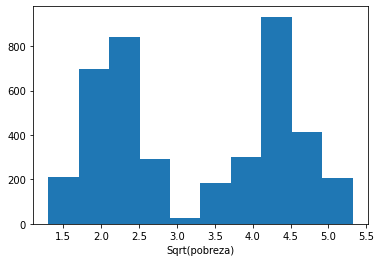

In [13]:
x_pobreza = np.array(data_out['pobreza'])
h = plt.hist(np.sqrt(x_pobreza+1));
plt.xlabel('Sqrt(pobreza)')

data_out['Sqrt_pobreza'] = np.sqrt(x_pobreza)
attrs = attrs + ['Sqrt_pobreza']
data_out[attrs].corr()

<AxesSubplot:xlabel='pobreza', ylabel='IDH'>

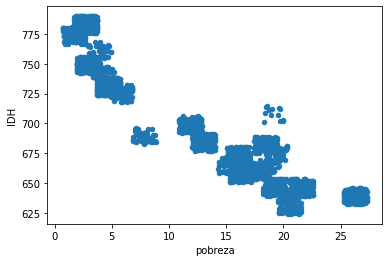

In [14]:
data_out.plot.scatter(x='pobreza', y='IDH')

<AxesSubplot:xlabel='Sqrt_pobreza', ylabel='IDH'>

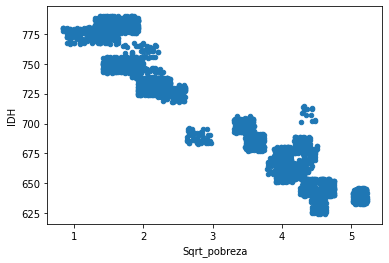

In [15]:
data_out.plot.scatter(x='Sqrt_pobreza', y='IDH')

### Importante

- Em muitos casos, mais de uma função de transformação pode atingir o mesmo objetivo
- Outras funções como (*e.g.* tan, exp) também podem ser usadas


### Assimetria (obliquidade ou *skewness*)

Intervalos de assimetria são simplificações que podem facilitar o entendimento com relação à normalidade dos dados

- $0$: Normalmente distribuida (ou perfeitamente simétrica)
- $> 0$: Maior concentração na cauda esquerda da distribuição (Positiva)
- $< 0$: Maior concentração na cauda direita da distribuição (Negativa)

<table>
    <thead>
        <tr>
            <th width="200px">Intervalos</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$[-0.5, 0.5]$</td>
            <td>Aproximadamente simétrica</td>
        </tr>
        <tr>
            <td>$[-1.0,-0.5]$ ou $[0.5,1.0]$</td>
            <td>Moderadamente assimétrica</td>
        </tr>
        <tr>
            <td>$[-∞,-1.0]$ ou $[1.0,∞]$</td>
            <td>Altamente assimétrica</td>
        </tr>
    </tbody>
</table>

In [16]:
normal = np.random.normal(loc=0, scale=1, size=1000)

low_pos = skewnorm.rvs(a=1, loc=0, scale=1, size=1000)
low_neg = skewnorm.rvs(a=-1, loc=0, scale=1, size=1000)

mid_pos = skewnorm.rvs(a=3, loc=0, scale=1, size=1000)
mid_neg = skewnorm.rvs(a=-3, loc=0, scale=1, size=1000)

high_pos = skewnorm.rvs(a=20, loc=0, scale=1, size=1000)
high_neg = skewnorm.rvs(a=-20, loc=0, scale=1, size=1000)

Text(0.5, 1.0, 'Sk.=0.96 (Alta)')

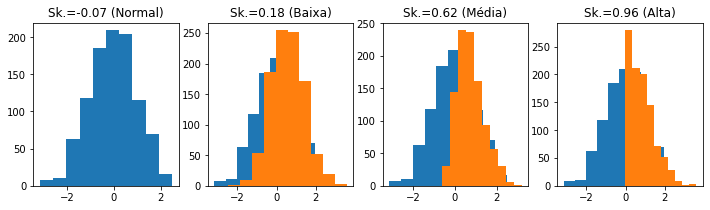

In [21]:
plt.figure(figsize=(12,3))
plt.subplot(141)
plt.hist(normal);#plt.hist(low_pos)#;plt.hist(low_neg)
plt.title('Sk.={:.2f} (Normal)'.format(skew(normal)))
plt.subplot(142)
plt.hist(normal);plt.hist(low_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos)))
plt.subplot(143)
plt.hist(normal);plt.hist(mid_pos)#; plt.hist(mid_neg)
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos)))
plt.subplot(144)
plt.hist(normal);plt.hist(high_pos)#; plt.hist(high_neg)
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos)))

### Transformações
<table>
    <thead>
        <tr>
            <th width="100px">Nível</th>
            <th width="150px">Assimetria Positiva</th>
            <th width="200px">Assimetria Negativa</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baixa</td>
            <td>$\sqrt{x + c}$</td>
            <td>$\sqrt{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Moderada</td>
            <td>$log_{10}~x + c$</td>
            <td>$log_{10}~{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>$\frac{1}{x + c}$</td>
            <td>$\frac{1}{\max(x+c) - x}$</td>
        </tr>
    </tbody>
</table>

In [22]:
low_pos_tf = np.sqrt(low_pos + 5)
mid_pos_tf = np.log10(mid_pos + 5)
high_pos_tf = 1 / (high_pos + 2)

Text(0.5, 1.0, 'Sk.=-0.13 (Alta)')

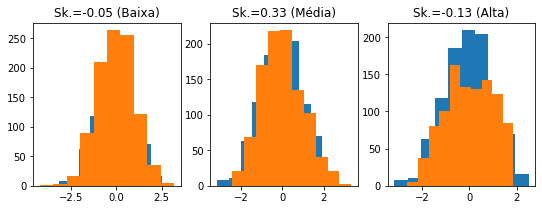

In [23]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))

### Powertransformer (*sklearn*)

In [24]:
df = pd.DataFrame({
    'low_pos': low_pos,
    'low_neg': low_neg,
    'mid_pos': mid_pos,
    'mid_neg': mid_neg,
    'high_pos': high_pos,
    'high_neg': high_neg
})

pf = PowerTransformer(method='yeo-johnson', standardize=True) # ou box-cox
df_tf = pf.fit_transform(df[df.columns])

low_pos_tf = df_tf[:,0]
low_neg_tf = df_tf[:, 1]

mid_pos_tf = df_tf[:, 2]
mid_neg_tf = df_tf[:, 3]

high_pos_tf = df_tf[:, 4]
high_neg_tf = df_tf[:, 5]

Text(0.5, 1.0, 'Sk.=0.04 (Alta)')

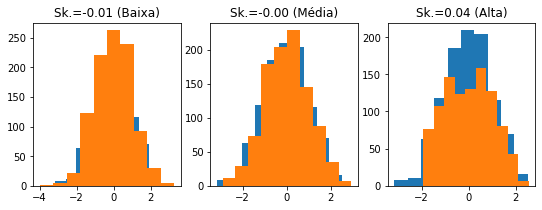

In [25]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.hist(normal);plt.hist(scale(low_pos_tf))
plt.title('Sk.={:.2f} (Baixa)'.format(skew(low_pos_tf)))
plt.subplot(132)
plt.hist(normal);plt.hist(scale(mid_pos_tf))
plt.title('Sk.={:.2f} (Média)'.format(skew(mid_pos_tf)))
plt.subplot(133)
plt.hist(normal);plt.hist(scale(high_pos_tf))
plt.title('Sk.={:.2f} (Alta)'.format(skew(high_pos_tf)))

### Resumo:

* Encontrar transformações nos atributos permite novas interpretações, para além do que temos como intuição 

* Transformações não excluem a limpeza e tratamento de dados 

* Transformações podem funcionar como geradores de novos atributos

* A assimetria pode ser usada para estudar as distribuições, e planejadas transformações para obter dados mais próximos de distribuições normais